### Modules Import 

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

### Data Import and Exploration

In [7]:
titanic = sns.load_dataset('titanic')

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.isnull().sum() #Deck has so much of null value 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Survival Rate by Deck

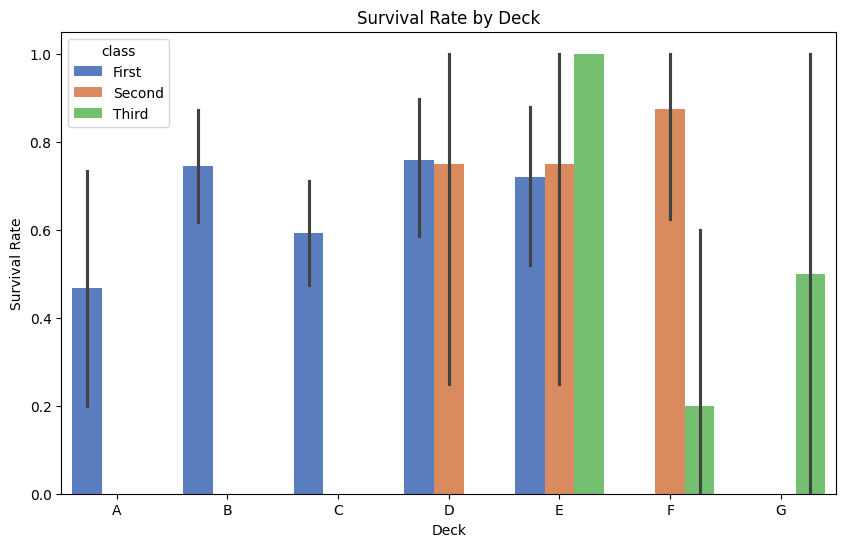

In [34]:
# Survival Rate by Deck
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='deck', y='survived', palette='muted' ,hue='class' )
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

#### Distribution of Passengers by Age

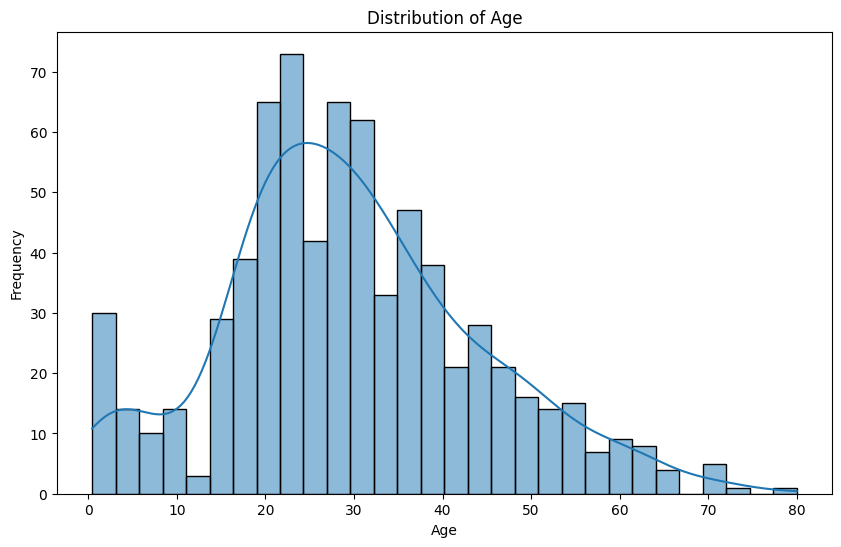

In [17]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Survival Rate by Sex

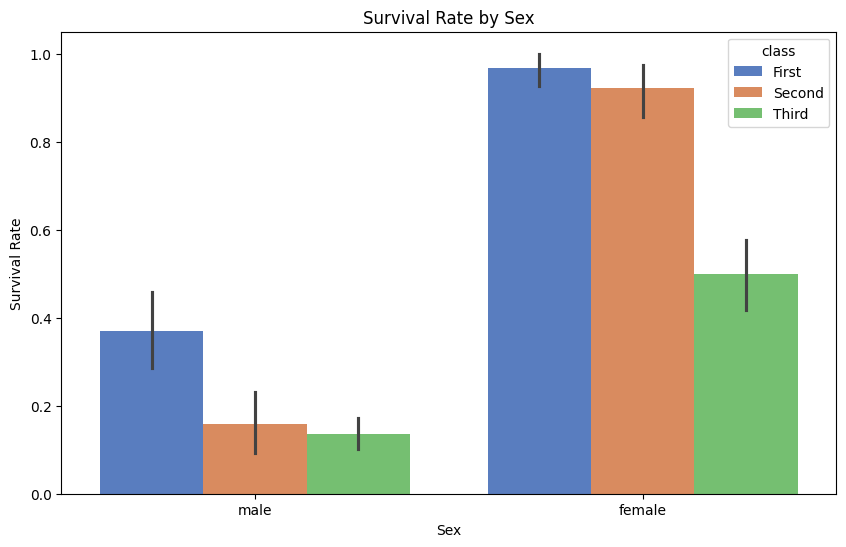

In [28]:
# Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='sex', y='survived', palette='muted' ,hue=)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

#### Survival Rate by Class

C:\Users\KSHITIJ\AppData\Local\Temp\ipykernel_24136\2071357091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='class', y='survived', palette='muted')


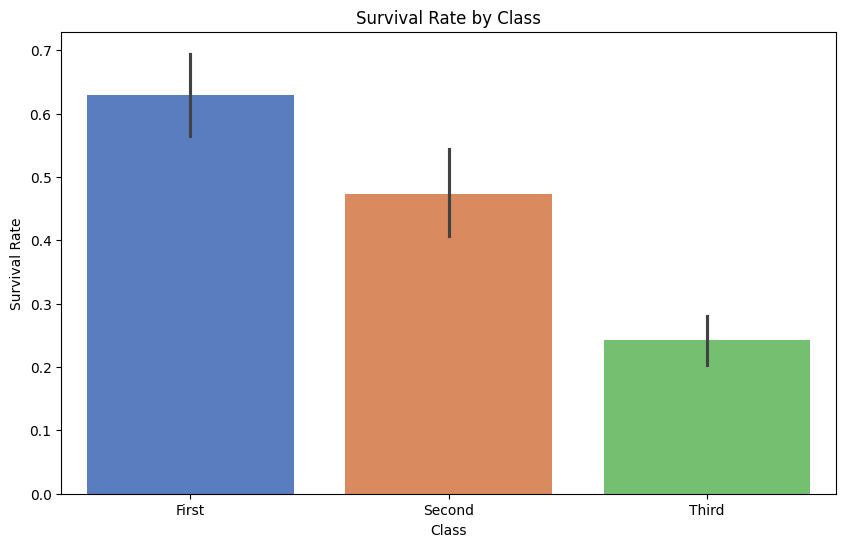

In [19]:
# Survival Rate by Class
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='class', y='survived', palette='muted')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

#### Survival Status by Age

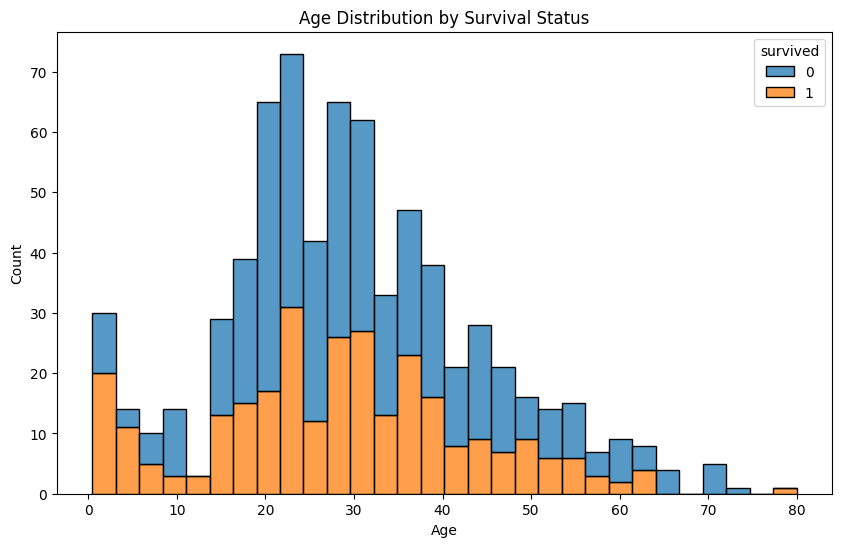

In [29]:
# Age Distribution by Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Heatmap of correlation matrix

<Axes: >

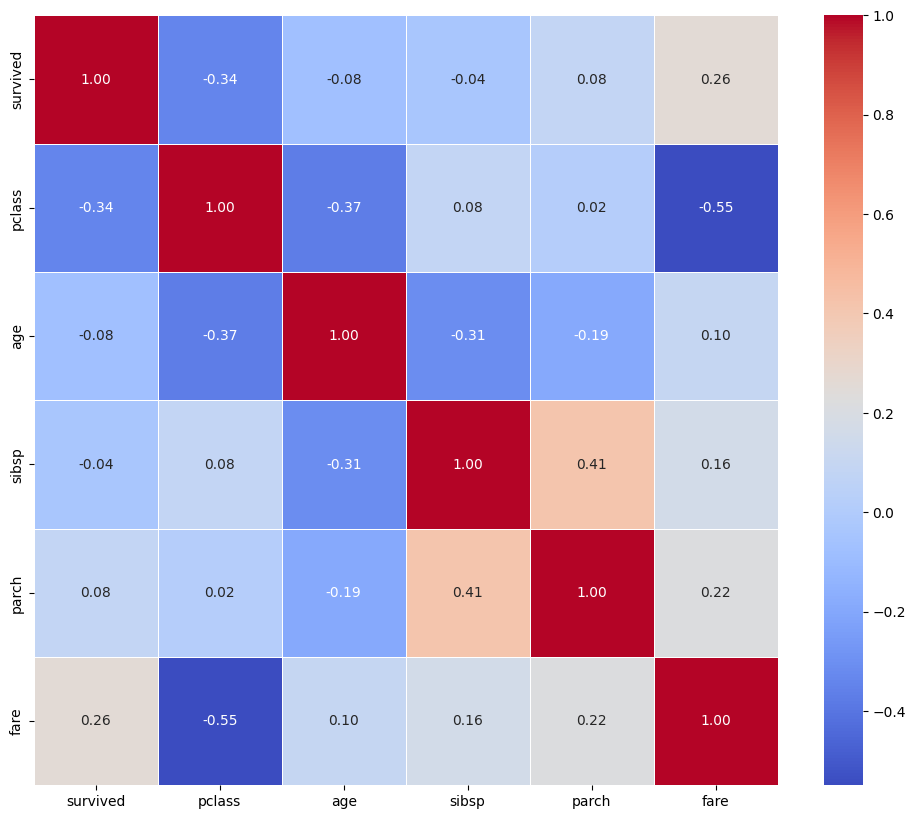

In [16]:
# Droping the non-numeric columns for correlation matrix
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_titanic.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

### Data Cleaning and Preprocessing 

In [48]:
# Handling missing values

# 1. Fill missing values in 'age' with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# 2. Fill missing values in 'embarked' with the most frequent value
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# 3. Drop the 'deck' column
titanic.drop(columns='deck', inplace=True)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


C:\Users\KSHITIJ\AppData\Local\Temp\ipykernel_24136\60574753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [56]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [49]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 13)
(712,)
(179, 13)
(179,)


In [51]:
# Identify numerical and categorical columns
numeric_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [52]:
# Pipeline for Numerical Features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [53]:
# Pipeline for Categorical Feature 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [54]:
# Combine the numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Model Training

In [74]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=22))
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=4))
])


# Training the RandomForest model
rf_pipeline.fit(X_train, y_train)

# Training the XGBoost model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'pclass',
                                                   'sibsp', 'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'embarked', 'c...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=4, ...))])

### Model Evaluation

In [78]:
rf_prediction = rf_pipeline.predict(X_test)
xgb_prediction = xgb_pipeline.predict(X_test)

# Comparing predictions with actual values
print('RandomForest Predictions:', rf_prediction[:10])
print('Actual Values:', y_test.values[:10])

print('XGBoost Predictions:', xgb_prediction[:10])
print('Actual Values:', y_test.values[:10])


RandomForest Predictions: [0 0 0 0 0 0 0 1 0 0]
Actual Values: [0 0 0 0 0 0 0 1 0 0]
XGBoost Predictions: [0 0 0 0 0 0 0 1 0 0]
Actual Values: [0 0 0 0 0 0 0 1 0 0]


In [79]:
# Calculate the accuracy score for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_prediction)

print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

rf_accuracy = accuracy_score(y_test, rf_prediction)

print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

XGBoost Test Accuracy: 1.0000
Random Forest Test Accuracy: 1.0000


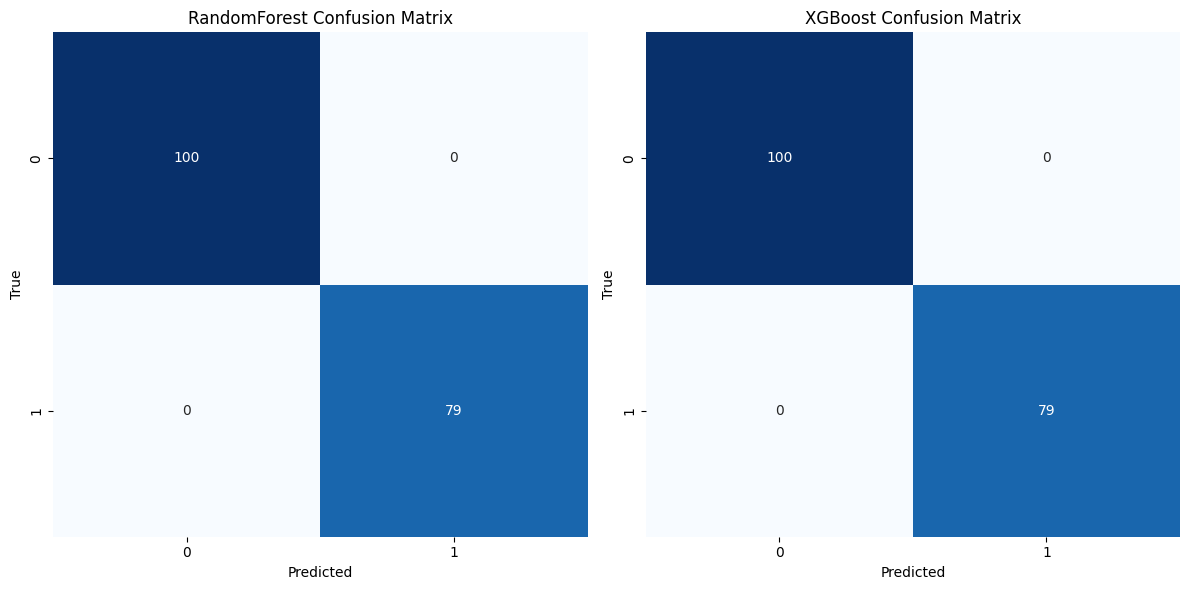

In [82]:
rf_conf_matrix = confusion_matrix(y_test, rf_y_prediction)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_prediction)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()